In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

Veri Okuma

In [2]:
dataFrame = pd.read_csv('satislar.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


Veriyi Anlamak

In [3]:
dataFrame.describe() ## Verinin istatistikleri

,Aylar,Satislar
count,30.000000,30.000000
mean,33.333333,36592.400000
std,17.131003,14876.425816
min,8.000000,4697.000000
25%,20.000000,28003.000000
50%,30.000000,31915.750000
75%,47.750000,50272.375000
max,65.000000,61195.500000


In [4]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

Aylar       0
Satislar    0
dtype: int64

Grafiksel Analiz

<AxesSubplot:xlabel='Satislar', ylabel='Density'>

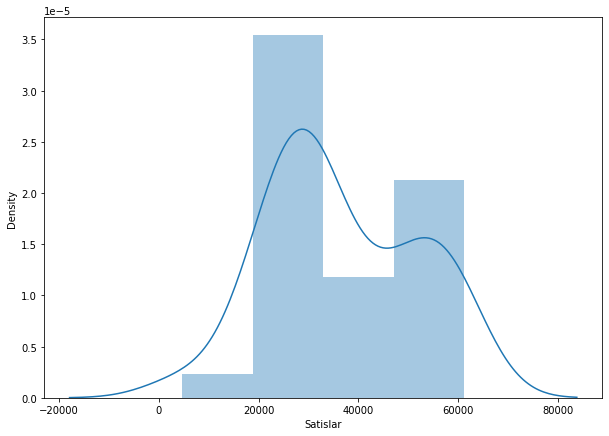

In [5]:
plt.figure(figsize=(10,7)) ## çıktıyı boyutlandırma
sbn.distplot(dataFrame['Satislar']) ## dağılım grafiği

<AxesSubplot:xlabel='Aylar', ylabel='Satislar'>

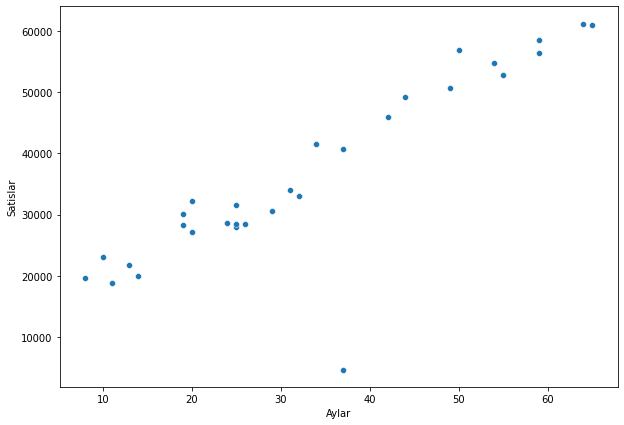

In [6]:
plt.figure(figsize=(10,7))
sbn.scatterplot(x='Aylar',y='Satislar',data=dataFrame) ## Noktasal grafik

Model Oluşturma

In [7]:
y = dataFrame['Satislar'].values ## Bağımlı veri
x = dataFrame.drop('Satislar',axis=1).values ## Bağımsız veriler

In [8]:
from sklearn.model_selection import train_test_split ## Verileri istediğimiz oranda bölmek için

In [9]:
x_train ,x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0) ## test ve train oranı 0.3 

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler() ## verileri scale etme aynı uzaya indirme denebilir

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
linearRegression = LinearRegression() ## LinearRegression ile öğrenme
linearRegression.fit(x_train,y_train)

LinearRegression()

In [14]:
guess = linearRegression.predict(x_test) ## x_teste göre tahmin
guess ## Tahmin verisi

array([20126.21865404, 57740.29412655, 30771.7117123 , 30062.01217508,
       54191.79644047, 50643.29875438, 54191.79644047, 30062.01217508,
       36449.30801003, 47094.80106829])

In [15]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [16]:
mean_absolute_error(y_test,guess) ## ortalama 2980 sapma var.

2980.0635526145006

In [17]:
from sklearn.metrics import r2_score

In [18]:
r2_score(y_test,guess)

0.9505048888122998

In [18]:
x_train = pd.DataFrame(x_train).sort_index()
y_train = pd.DataFrame(y_train).sort_index()

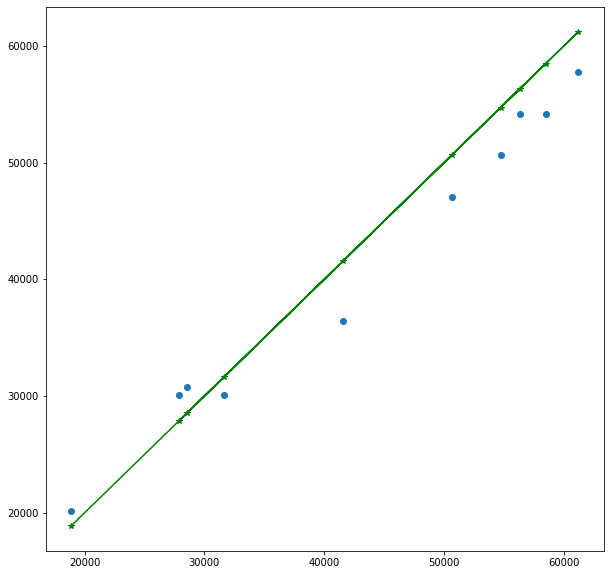

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,guess)
plt.plot(y_test,y_test,'g-*')